In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Object Detection and Tracking using YOLOV11 and Bot Sort**

**Installing the ultralytics library, which provides pre-trained YOLO models for object detection and tracking.**

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.0/887.0 kB 11.4 MB/s eta 0:00:0000:010:01


## **Training the Model on the Custom Dataset** 

In [2]:
from ultralytics import YOLO

# Loading the pretrained YOLOv11 model 
model = YOLO("yolo11m.pt") 

# Training the model on the custom dataset
model.train(data='/kaggle/input/basketball/data.yaml', epochs=75, imgsz=1088, batch=-1, device=0 ,patience=5,plots=True)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 38.8M/38.8M [00:00<00:00, 156MB/s] 


Ultralytics 8.3.32 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/kaggle/input/basketball/data.yaml, epochs=75, time=None, patience=5, batch=-1, imgsz=1088, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=T

100%|██████████| 755k/755k [00:00<00:00, 14.2MB/s]
2024-11-18 10:11:00,007	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-11-18 10:11:01,048	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=9

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 65.6MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/basketball/train/labels... 1438 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1438/1438 [00:07<00:00, 183.49it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/basketball/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
AutoBatch: Computing optimal batch size for imgsz=1088 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.74G total, 0.21G reserved, 0.19G allocated, 14.33G free


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    20059947       197.2         1.728          79.1         219.5      (1, 3, 1088, 1088)                    list
    20059947       394.3         3.253         86.45         100.5      (2, 3, 1088, 1088)                    list
    20059947       788.7         6.197         131.5         153.7      (4, 3, 1088, 1088)                    list
    20059947        1577        12.103         264.7         296.9      (8, 3, 1088, 1088)                    list
CUDA out of memory. Tried to allocate 578.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 182.12 MiB is free. Process 3502 has 14.56 GiB memory in use. Of the allocated memory 14.03 GiB is allocated by PyTorch, and 346.15 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation fo

train: Scanning /kaggle/input/basketball/train/labels... 1438 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1438/1438 [00:01<00:00, 795.69it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/basketball/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/basketball/valid/labels... 206 images, 0 backgrounds, 0 corrupt: 100%|██████████| 206/206 [00:01<00:00, 184.39it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/basketball/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000769, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005078125), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1088 train, 1088 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 75 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/75      8.42G      1.444      1.692      1.442         62       1088: 100%|██████████| 288/288 [02:28<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.29it/s]

                   all        206       3123      0.849      0.838      0.876      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/75       8.1G      1.288      1.081      1.341         74       1088: 100%|██████████| 288/288 [02:30<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.62it/s]

                   all        206       3123      0.844      0.817      0.889        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/75      8.06G      1.281      1.054      1.336        115       1088: 100%|██████████| 288/288 [02:31<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.58it/s]

                   all        206       3123      0.868      0.858      0.897      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/75      8.03G      1.239      1.004      1.317         75       1088: 100%|██████████| 288/288 [02:31<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.57it/s]

                   all        206       3123       0.92      0.873      0.927      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/75      8.07G       1.21     0.9233        1.3         31       1088: 100%|██████████| 288/288 [02:31<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.58it/s]

                   all        206       3123      0.922       0.88      0.932      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/75      8.04G      1.182     0.8724      1.279         25       1088: 100%|██████████| 288/288 [02:31<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.59it/s]

                   all        206       3123      0.928      0.898      0.941      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/75      8.08G      1.145     0.8246      1.251         89       1088: 100%|██████████| 288/288 [02:31<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.60it/s]

                   all        206       3123      0.935      0.913      0.943      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/75      8.09G      1.133     0.8053      1.245         37       1088: 100%|██████████| 288/288 [02:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.60it/s]

                   all        206       3123      0.949      0.919      0.955      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/75      8.07G      1.102     0.7801      1.226         47       1088: 100%|██████████| 288/288 [02:31<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.59it/s]

                   all        206       3123      0.953      0.921      0.959      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/75      8.06G      1.086     0.7551      1.218         59       1088: 100%|██████████| 288/288 [02:31<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.59it/s]

                   all        206       3123      0.957      0.933       0.96      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/75      8.13G      1.082      0.736      1.212         47       1088: 100%|██████████| 288/288 [02:31<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.59it/s]

                   all        206       3123      0.957      0.932      0.964      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/75      7.98G      1.052      0.707      1.189         66       1088: 100%|██████████| 288/288 [02:31<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.59it/s]

                   all        206       3123       0.96      0.947      0.969      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/75      8.06G      1.046     0.6924      1.182         99       1088: 100%|██████████| 288/288 [02:31<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.60it/s]

                   all        206       3123      0.967      0.941      0.971      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/75      8.08G      1.013     0.6731       1.17         83       1088: 100%|██████████| 288/288 [02:31<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.59it/s]

                   all        206       3123      0.961      0.945      0.971      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/75      8.07G       1.01     0.6537      1.162        109       1088: 100%|██████████| 288/288 [02:31<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.60it/s]

                   all        206       3123      0.965      0.944      0.973       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/75      8.08G      1.002     0.6525      1.159         51       1088: 100%|██████████| 288/288 [02:31<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.60it/s]

                   all        206       3123      0.967      0.957      0.973      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/75      7.96G     0.9853     0.6456      1.152         38       1088: 100%|██████████| 288/288 [02:31<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.60it/s]

                   all        206       3123       0.97      0.953      0.979      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/75      8.08G     0.9569     0.6074      1.134         75       1088: 100%|██████████| 288/288 [02:31<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.60it/s]

                   all        206       3123      0.977       0.95      0.977       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/75      8.03G     0.9719     0.6141      1.145         84       1088: 100%|██████████| 288/288 [02:31<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.61it/s]

                   all        206       3123      0.974      0.955      0.978      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/75      8.05G     0.9574     0.6045      1.137         56       1088: 100%|██████████| 288/288 [02:31<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.60it/s]

                   all        206       3123      0.961      0.962      0.978      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/75       8.1G     0.9488     0.6041      1.136         56       1088: 100%|██████████| 288/288 [02:31<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.59it/s]

                   all        206       3123      0.975      0.955      0.981      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/75      8.11G     0.9341     0.5772      1.118         70       1088: 100%|██████████| 288/288 [02:31<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.60it/s]

                   all        206       3123       0.98       0.96      0.983      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/75      7.95G     0.9166     0.5758      1.109         35       1088: 100%|██████████| 288/288 [02:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.60it/s]

                   all        206       3123      0.975       0.96      0.981      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/75       8.1G     0.9261      0.574       1.11         29       1088: 100%|██████████| 288/288 [02:31<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.59it/s]

                   all        206       3123      0.975      0.963      0.981      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/75       8.1G     0.8971     0.5495      1.095         54       1088: 100%|██████████| 288/288 [02:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.59it/s]

                   all        206       3123      0.977      0.968      0.985      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/75      8.06G     0.8984     0.5522      1.099         44       1088: 100%|██████████| 288/288 [02:31<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.60it/s]

                   all        206       3123       0.98      0.967      0.986       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/75      7.99G      0.873     0.5332      1.082         55       1088: 100%|██████████| 288/288 [02:31<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.61it/s]

                   all        206       3123       0.98      0.967      0.985      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/75      8.08G     0.8729     0.5231      1.083         73       1088: 100%|██████████| 288/288 [02:31<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.60it/s]

                   all        206       3123       0.98      0.962      0.986       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/75      8.08G     0.8711     0.5239      1.079         56       1088: 100%|██████████| 288/288 [02:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.60it/s]

                   all        206       3123      0.977      0.971      0.985       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/75      8.03G     0.8662     0.5265      1.078         49       1088: 100%|██████████| 288/288 [02:31<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.60it/s]

                   all        206       3123      0.978      0.966      0.983      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/75      7.98G     0.8706     0.5228      1.078         95       1088: 100%|██████████| 288/288 [02:31<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.60it/s]

                   all        206       3123      0.981      0.966      0.986      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/75      7.97G     0.8416     0.5026      1.068         60       1088: 100%|██████████| 288/288 [02:31<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.61it/s]

                   all        206       3123      0.976      0.979      0.989      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/75      8.06G     0.8332     0.5049      1.061         66       1088: 100%|██████████| 288/288 [02:31<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.60it/s]

                   all        206       3123      0.983      0.973      0.988      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/75      7.99G     0.8318     0.5003      1.061         99       1088: 100%|██████████| 288/288 [02:31<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.60it/s]

                   all        206       3123      0.987      0.974      0.987      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/75      8.05G     0.8295      0.485      1.048         50       1088: 100%|██████████| 288/288 [02:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.60it/s]

                   all        206       3123      0.981      0.974      0.985        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/75      8.05G     0.8114     0.4853      1.046         68       1088: 100%|██████████| 288/288 [02:31<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.61it/s]

                   all        206       3123      0.985      0.975       0.99      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/75      8.14G      0.809     0.4773      1.044         58       1088: 100%|██████████| 288/288 [02:31<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.59it/s]

                   all        206       3123      0.987      0.977      0.989      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/75      8.06G     0.7963     0.4705      1.041         44       1088: 100%|██████████| 288/288 [02:31<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.60it/s]

                   all        206       3123      0.987      0.976      0.986      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/75      7.99G     0.7978     0.4655      1.038         66       1088: 100%|██████████| 288/288 [02:31<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.60it/s]

                   all        206       3123      0.987      0.975      0.991      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/75      8.06G     0.7798     0.4584      1.028         50       1088: 100%|██████████| 288/288 [02:31<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.60it/s]

                   all        206       3123      0.989      0.974      0.991      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/75      8.08G     0.7731     0.4509      1.026         70       1088: 100%|██████████| 288/288 [02:31<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.61it/s]

                   all        206       3123       0.98      0.978       0.99      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/75      8.01G      0.778     0.4539      1.022         55       1088: 100%|██████████| 288/288 [02:31<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.61it/s]

                   all        206       3123      0.988      0.975      0.989      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/75      8.04G     0.7704     0.4433      1.023         69       1088: 100%|██████████| 288/288 [02:31<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.59it/s]

                   all        206       3123      0.991      0.977      0.991      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/75      7.99G     0.7563     0.4412      1.022         45       1088: 100%|██████████| 288/288 [02:31<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.60it/s]

                   all        206       3123      0.986      0.979       0.99      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/75      8.09G     0.7578     0.4345      1.017         59       1088: 100%|██████████| 288/288 [02:31<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.60it/s]

                   all        206       3123      0.987      0.981      0.991       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/75      8.06G     0.7512      0.434      1.013         35       1088: 100%|██████████| 288/288 [02:31<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.60it/s]

                   all        206       3123      0.988      0.979      0.992      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/75      8.07G     0.7379     0.4261      1.006         36       1088: 100%|██████████| 288/288 [02:31<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.60it/s]

                   all        206       3123      0.991      0.977      0.992      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/75      7.99G     0.7365     0.4225      1.002         34       1088: 100%|██████████| 288/288 [02:31<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.60it/s]

                   all        206       3123      0.985      0.983      0.992      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/75      8.02G     0.7191     0.4127     0.9963         58       1088: 100%|██████████| 288/288 [02:31<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.60it/s]

                   all        206       3123      0.991      0.983      0.993      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/75      8.04G     0.7351     0.4215          1        113       1088:  75%|███████▌  | 216/288 [01:54<00:37,  1.90it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

      51/75      8.04G     0.7027     0.4047     0.9882         36       1088: 100%|██████████| 288/288 [02:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.59it/s]

                   all        206       3123      0.992      0.979      0.991      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/75      8.11G     0.7187     0.4077     0.9952         54       1088: 100%|██████████| 288/288 [02:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.60it/s]

                   all        206       3123      0.986      0.984      0.992       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/75      8.07G     0.6922     0.3939     0.9792         42       1088: 100%|██████████| 288/288 [02:31<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.60it/s]

                   all        206       3123      0.992      0.981      0.993      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/75      8.09G     0.6995      0.399     0.9879         50       1088: 100%|██████████| 288/288 [02:31<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.59it/s]

                   all        206       3123      0.991       0.98       0.99      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/75         8G     0.6879     0.3949     0.9862         62       1088: 100%|██████████| 288/288 [02:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.60it/s]

                   all        206       3123      0.992      0.981      0.992      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/75      8.01G     0.6831     0.3926     0.9824         70       1088: 100%|██████████| 288/288 [02:31<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.61it/s]

                   all        206       3123      0.991      0.985      0.993      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/75      8.09G     0.6762     0.3884     0.9766         77       1088: 100%|██████████| 288/288 [02:31<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.60it/s]

                   all        206       3123      0.993      0.983      0.993      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/75      8.01G     0.6653     0.3749     0.9709         67       1088: 100%|██████████| 288/288 [02:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.60it/s]

                   all        206       3123      0.993      0.983      0.994      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/75         8G      0.661     0.3737     0.9657         58       1088: 100%|██████████| 288/288 [02:31<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.61it/s]

                   all        206       3123      0.993      0.982      0.993      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/75      7.99G     0.6529     0.3751     0.9704         62       1088: 100%|██████████| 288/288 [02:31<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.60it/s]

                   all        206       3123      0.994      0.982      0.993      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/75      8.05G     0.6498     0.3709      0.965         42       1088: 100%|██████████| 288/288 [02:31<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.60it/s]

                   all        206       3123      0.991      0.985      0.993      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/75      8.04G     0.6495     0.3716      0.964         63       1088: 100%|██████████| 288/288 [02:31<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.60it/s]

                   all        206       3123      0.992      0.985      0.993      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/75         8G     0.6409     0.3653     0.9635         63       1088: 100%|██████████| 288/288 [02:31<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.60it/s]

                   all        206       3123      0.992      0.984      0.993      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/75       8.1G     0.6425     0.3681     0.9707         42       1088: 100%|██████████| 288/288 [02:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.51it/s]

                   all        206       3123      0.993      0.983      0.993      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/75      8.06G     0.6299     0.3575     0.9529         31       1088: 100%|██████████| 288/288 [02:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.59it/s]

                   all        206       3123      0.989      0.986      0.994      0.754


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/75      8.07G     0.5878      0.313     0.9233         32       1088: 100%|██████████| 288/288 [02:31<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.60it/s]

                   all        206       3123      0.991      0.983      0.993      0.749
EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 61, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



66 epochs completed in 2.959 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 40.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 40.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.32 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 303 layers, 20,036,971 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.36it/s]


                   all        206       3123      0.991      0.985      0.993      0.755
                  Ball        157        161      0.987      0.947      0.989      0.709
                  Hoop        138        140      0.973      0.986      0.989      0.819
                Period        162        164      0.997      0.994      0.995      0.641
                Player        203       1504      0.991      0.977       0.99      0.871
                   Ref        159        353      0.994      0.991      0.995      0.864
            Shot Clock        152        154          1      0.981      0.995      0.603
             Team Name         80        160      0.997          1      0.995      0.793
           Team Points        166        326      0.994      0.997      0.995      0.763
        Time Remaining        161        161      0.988      0.994      0.995      0.731
Speed: 0.6ms preprocess, 32.3ms inference, 0.1ms loss, 1.7ms postprocess per image
Results saved to runs/detec

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78d45e9b9240>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0470

In [3]:
model.val()

Ultralytics 8.3.32 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 303 layers, 20,036,971 parameters, 0 gradients, 67.7 GFLOPs


val: Scanning /kaggle/input/basketball/valid/labels... 206 images, 0 backgrounds, 0 corrupt: 100%|██████████| 206/206 [00:00<00:00, 607.90it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/basketball/valid is not writeable, cache not saved.



/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:15<00:00,  2.67it/s]


                   all        206       3123      0.992      0.985      0.993      0.757
                  Ball        157        161      0.993      0.948      0.989      0.708
                  Hoop        138        140      0.973      0.986      0.989      0.823
                Period        162        164      0.997      0.994      0.995      0.648
                Player        203       1504      0.992      0.977       0.99       0.87
                   Ref        159        353      0.994      0.991      0.995      0.866
            Shot Clock        152        154          1      0.981      0.995      0.605
             Team Name         80        160      0.997          1      0.995      0.787
           Team Points        166        326      0.994      0.997      0.995      0.767
        Time Remaining        161        161      0.988      0.994      0.995      0.736
Speed: 0.7ms preprocess, 67.4ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detec

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78d474ee8040>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0470

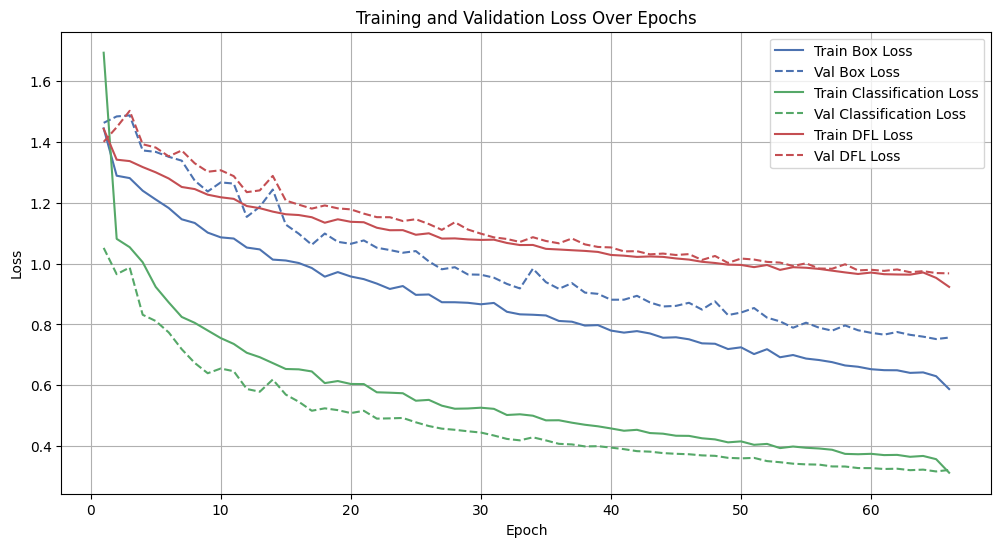

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the results CSV (adjust path as necessary)
results_df = pd.read_csv('/kaggle/working/runs/detect/train/results.csv')

#Plotting training and validation losses
plt.figure(figsize=(12, 6))

# Box loss plot
plt.plot(results_df['epoch'], results_df['train/box_loss'], label='Train Box Loss', color='b')
plt.plot(results_df['epoch'], results_df['val/box_loss'], '--', label='Val Box Loss', color='b')

# Classification loss plot
plt.plot(results_df['epoch'], results_df['train/cls_loss'], label='Train Classification Loss', color='g')
plt.plot(results_df['epoch'], results_df['val/cls_loss'], '--', label='Val Classification Loss', color='g')

# DFL loss plot
plt.plot(results_df['epoch'], results_df['train/dfl_loss'], label='Train DFL Loss', color='r')
plt.plot(results_df['epoch'], results_df['val/dfl_loss'], '--', label='Val DFL Loss', color='r')

# Adding labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)

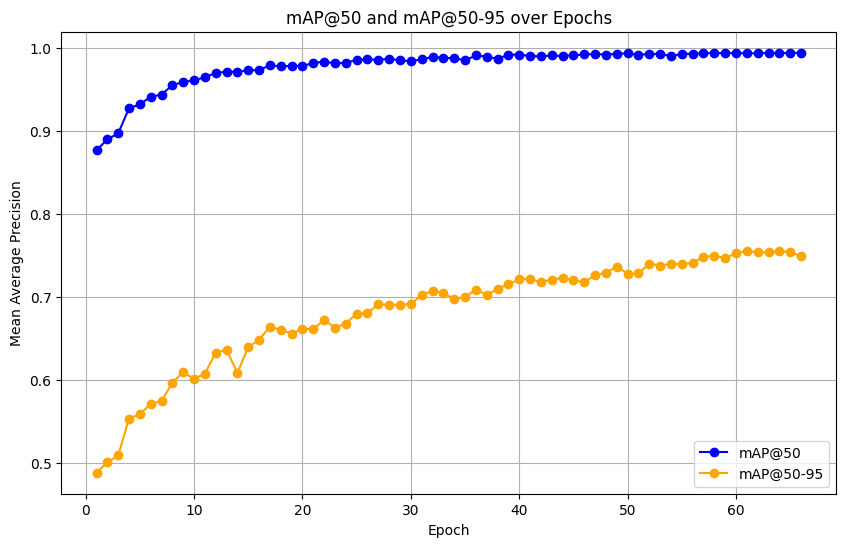

In [11]:
# Plotting mAP@50 and mAP@90 metrics over epochs
plt.figure(figsize=(10, 6))

# Plot mAP metrics
plt.plot(results_df['epoch'], results_df['metrics/mAP50(B)'], label='mAP@50', marker='o', color='blue')
plt.plot(results_df['epoch'], results_df['metrics/mAP50-95(B)'], label='mAP@50-95', marker='o', color='orange')

# Adding labels, title, and legend
plt.xlabel('Epoch')
plt.ylabel('Mean Average Precision')
plt.title('mAP@50 and mAP@50-95 over Epochs')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

## **Object Detection using Custom Yolo V11** 

**YOLO (You Only Look Once) is a popular and powerful real-time object detection algorithm known for its speed and accuracy in detecting and classifying objects in images or videos. Unlike traditional object detection systems that repurpose classifiers or localizers to perform detection, YOLO frames object detection as a single regression problem, predicting both the object classes and bounding boxes directly from an input image in one evaluation.**

In [14]:
# Loading the trained YOLO model
custom_model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

# Applying the model on the video
results = custom_model.predict(source='https://media.roboflow.com/supervision/video-examples/basketball-1.mp4',imgsz=1088,
                        save=True)


Found https://media.roboflow.com/supervision/video-examples/basketball-1.mp4 locally at basketball-1.mp4

WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/477) /kaggle/working/basketball-1.mp4: 640x1088 (no detections), 60.1ms
video 1/1 (frame 2/477) /kaggle/working/basketball-1.mp4: 640x1088 (no detections), 39.9ms
video 1/1 (frame 3/477) /kaggle/working/basketball-1.mp4: 640x1088 (no detections), 38.8ms
video 1/1 (frame 4/477) /kaggle/working/basketball-1.mp4: 640x1088 (no detecti

## **Using Bot Sort for object tracking** 

**Bot Sort is an advanced object tracking algorithm used to track multiple objects across video frames. It builds upon previous tracking algorithms, such as Deep Sort, and aims to enhance tracking accuracy and stability, particularly in complex scenarios like crowded scenes or occluded objects.**

In [15]:
results = custom_model.track(source="https://media.roboflow.com/supervision/video-examples/basketball-1.mp4",imgsz=1088, persist=True, save=True)

requirements: Ultralytics requirement ['lapx>=0.5.2'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 27.8 MB/s eta 0:00:00 0:00:01

requirements: AutoUpdate success ✅ 11.0s, installed 1 package: ['lapx>=0.5.2']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


Found https://media.roboflow.com/supervision/video-examples/basketball-1.mp4 locally at basketball-1.mp4

WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1

In [4]:
!zip -r file.zip /kaggle/working

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/.virtual_documents/ (stored 0%)
  adding: kaggle/working/yolo11n.pt (deflated 11%)
  adding: kaggle/working/runs/ (stored 0%)
  adding: kaggle/working/runs/detect/ (stored 0%)
  adding: kaggle/working/runs/detect/train2/ (stored 0%)
  adding: kaggle/working/runs/detect/train2/PR_curve.png (deflated 19%)
  adding: kaggle/working/runs/detect/train2/val_batch1_pred.jpg (deflated 10%)
  adding: kaggle/working/runs/detect/train2/F1_curve.png (deflated 9%)
  adding: kaggle/working/runs/detect/train2/val_batch0_pred.jpg (deflated 11%)
  adding: kaggle/working/runs/detect/train2/val_batch0_labels.jpg (deflated 11%)
  adding: kaggle/working/runs/detect/train2/val_batch2_labels.jpg (deflated 11%)
  adding: kaggle/working/runs/detect/train2/val_batch2_pred.jpg (deflated 11%)
  adding: kaggle/working/runs/detect/train2/confusion_matrix.png (deflated 24%)
  adding: kaggle/working/runs/detect/train2/R_curve.png (deflated 9%)
  adding: ka